In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
import plotly.express as px

In [3]:

df = df = pd.read_csv(r"athlete_events.csv")

In [4]:
print(df['NOC'].nunique())
print(df['NOC'])

230
0         CHN
1         CHN
2         DEN
3         DEN
4         NED
         ... 
271111    POL
271112    POL
271113    POL
271114    POL
271115    POL
Name: NOC, Length: 271116, dtype: object


In [5]:
df['Sport']

0            Basketball
1                  Judo
2              Football
3            Tug-Of-War
4         Speed Skating
              ...      
271111             Luge
271112      Ski Jumping
271113      Ski Jumping
271114        Bobsleigh
271115        Bobsleigh
Name: Sport, Length: 271116, dtype: object

 e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,

In [6]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].std())

25.556898357297374
24.0
10.0
97.0
6.393560847035813


In [7]:
df = df.fillna({
    'Age': df['Age'].median(),
    'Height': df['Height'].median(),
    'Weight': df['Weight'].median(),
    'ID': df['ID'].median()
})

df = df.astype({'Age': 'uint8', 'Height': 'uint8', 'Weight': 'uint8', 'ID': 'uint32' , 'Year': 'int16'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      271116 non-null  uint32
 1   Name    271116 non-null  object
 2   Sex     271116 non-null  object
 3   Age     271116 non-null  uint8 
 4   Height  271116 non-null  uint8 
 5   Weight  271116 non-null  uint8 
 6   Team    271116 non-null  object
 7   NOC     271116 non-null  object
 8   Games   271116 non-null  object
 9   Year    271116 non-null  int16 
 10  Season  271116 non-null  object
 11  City    271116 non-null  object
 12  Sport   271116 non-null  object
 13  Event   271116 non-null  object
 14  Medal   39783 non-null   object
dtypes: int16(1), object(10), uint32(1), uint8(3)
memory usage: 23.0+ MB


<Axes: xlabel='Sex'>

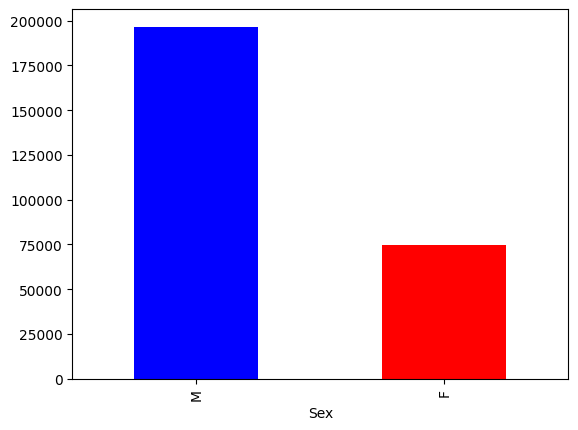

In [8]:
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'])

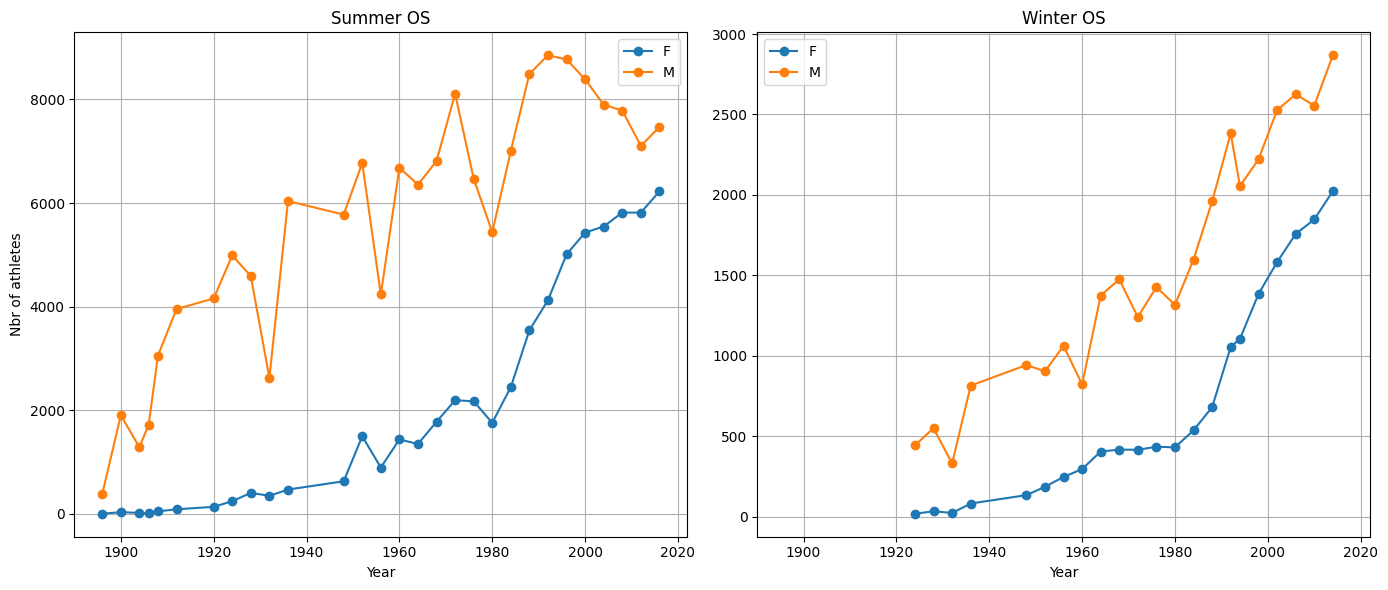

In [9]:

gender_year_season = df.groupby(['Season', 'Year', 'Sex']).size().unstack(fill_value=0)


cycling_heatmap_fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

gender_year_season.loc['Summer'].plot(ax=axes[0], marker='o')
axes[0].set_title('Summer OS')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Nbr of athletes')
axes[0].legend()
axes[0].grid(True)

gender_year_season.loc['Winter'].plot(ax=axes[1], marker='o')
axes[1].set_title('Winter OS')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


<Axes: xlabel='NOC'>

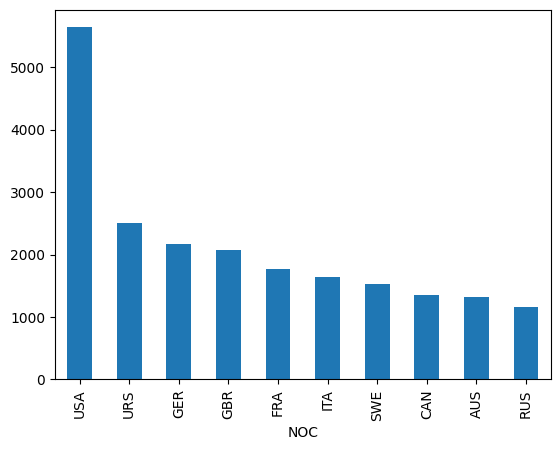

In [10]:
df.groupby('NOC')['Medal'].count().sort_values(ascending=False).iloc[:10].plot.bar()

# ITALIA

In [11]:
italydf = df[df['NOC'] == 'ITA']
italydf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,91,Emanuele Abate,M,27,190,80,Italy,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,92,Ignazio Abate,M,21,180,73,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,103,Silvano Abba,M,25,175,70,Italy,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,106,Agostino Abbagnale,M,22,188,96,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270724,135391,Loredana Zugna,F,32,170,55,Italy,ITA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN
270760,135409,Mauro Carlo Zuliani,M,20,175,62,Italy,ITA,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 400 metres,NaN
270761,135409,Mauro Carlo Zuliani,M,20,175,62,Italy,ITA,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze
270762,135409,Mauro Carlo Zuliani,M,25,175,62,Italy,ITA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,NaN


In [12]:
#Skapa anonyma HASH-värden i den primära dataframen
df.insert(loc=2, column="Name_HASH", value = df["Name"].apply( lambda x:
                                             hashlib.sha256(x.encode()).hexdigest()
                                             ))

#Ta bort namnkolumnen från värdena
df_anon = df.drop(["Name"], axis=1)

#Ditto, fast för cycling
italydf.insert(loc=2, column="Name_HASH", value = italydf["Name"].apply( lambda x:
                                             hashlib.sha256(x.encode()).hexdigest()
                                             ))

italydf_anon = italydf.drop(["Name"], axis=1)

### Panagiotis: Cycling (you knew it)

The Olympic games, like most organized sports, has historically excluded women.\
For this reason we'll compare cycling participation of each event over the years, split by gender.\
\
As we can see, women have only been allowed to compete since 1980, and even then it was only one discipline.\
Participation increased slowly, and in 1996 when the more modern MTB and BMX events were introduced women were ready at the start.\
Since 2012 the cycling events are homogenous - women and men participate in the same, albeit separated, disciplines.

In [40]:
cycling_df = df_anon[df_anon["Sport"] == "Cycling"].copy()
cycling_df = df_anon[df_anon["Sport"] == "Cycling"].copy()

cycling_df["Event"] = cycling_df["Event"].str.replace(
    "Cycling Women's Team Pursuit",
    "Cycling Women's Team Pursuit, 4,000 metres",
)

def cycling_base_event(cycling_event):
    cycling_event = cycling_event.replace("Cycling ", "")
    cycling_event = cycling_event.replace("Men's ", "")
    cycling_event = cycling_event.replace("Women's ", "")
    return cycling_event

cycling_df.loc[:, "Base Event"] = cycling_df["Event"].apply(cycling_base_event)

unique_cycling_events = cycling_df["Base Event"].unique()

men_event_amount = (cycling_df[cycling_df["Sex"] == "M"].groupby("Base Event")["Year"].nunique())
sorted_base_events = sorted(unique_cycling_events, key=lambda x: men_event_amount.get(x, 0), reverse=True)

cycling_df["Grouped Event"] = cycling_df.apply(lambda cycling_heatmap_row: f"{"Men's" if cycling_heatmap_row["Sex"] == "M" else "Women's"} {cycling_heatmap_row["Base Event"]}", axis=1)

cycling_heatmap_data = cycling_df.groupby(["Grouped Event", "Year"])["ID"].count().reset_index()
cycling_heatmap_data["Base Event"] = cycling_heatmap_data["Grouped Event"].apply(lambda x: x.split(" ", 1)[1])

cycling_heatmap_data["Base Event Order"] = cycling_heatmap_data["Base Event"].apply(lambda x: sorted_base_events.index(x))
cycling_heatmap_data["Gender"] = cycling_heatmap_data["Grouped Event"].apply(lambda x: x.split(" ", 1)[0])
cycling_heatmap_data = cycling_heatmap_data.sort_values(by=["Base Event Order", "Gender"])

cycling_heatmap_data = cycling_heatmap_data.drop(columns=["Base Event", "Base Event Order", "Gender"])
cycling_heatmap_data = cycling_heatmap_data.iloc[::-1]

cycling_color_scale = [[0.0, "white"], [0.001, "salmon"], [1.0, "blue"]]

cycling_heatmap_fig = px.density_heatmap(
    cycling_heatmap_data,
    x="Year",
    y="Grouped Event",
    z="ID",
    nbinsx=int((cycling_df["Year"].max()-cycling_df["Year"].min()+4)/2),
    color_continuous_scale=cycling_color_scale,
    title="Cycling through the Olympics",
    labels={"ID": "participants"},
    height=800,
    text_auto=True,
)

cycling_heatmap_end_year = cycling_df["Year"].max()
cycling_heatmap_tick_vals = list(range(1896, cycling_heatmap_end_year + 1, 8))


cycling_heatmap_fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Event",
    coloraxis_colorbar={"title": "Participants"},
    xaxis=dict(tickmode="array", tickvals=cycling_heatmap_tick_vals)
    
)

cycling_heatmap_fig.add_annotation(
    text="Amount of cycling event participants by year and event", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False, font=dict(size=14))

cycling_heatmap_fig.show()


### Cycling medal distribution by country

Team duplicates are removed, counting only by unique event and year.\
Road cycling culture may be primarily associated with France and Italy, but UK is definitely on level with France, and US & Australia also provide a solid supply of ambitious cyclists.

In [14]:
national_cycling_df = cycling_df[["NOC", "Year", "Event", "Medal"]].drop_duplicates()
cycling_medal_distribution_noc = national_cycling_df.groupby("NOC")["Medal"].value_counts().unstack().fillna(0)
cycling_medal_distribution_noc = cycling_medal_distribution_noc.assign(Total=cycling_medal_distribution_noc.sum(axis=1)).sort_values(by="Total", ascending=False).iloc[:15]


national_cycling_fig = px.bar(
    cycling_medal_distribution_noc.reset_index(),
    x="NOC",
    y=["Bronze", "Silver", "Gold"],
    title="Cycling medal distribution by country",
    labels={"value": "Number of medals", "variable": "Medal Type", "NOC": "Country"},
    color_discrete_map={"Bronze": "saddlebrown", "Silver": "silver", "Gold": "gold"},
    barmode="stack"
)

national_cycling_fig.update_layout(xaxis_tickangle=-45)
national_cycling_fig.show()

### Medal distribution by age

How does aging affect likelihood to score a medal in Olympic cycling?\
While entering their 30's (and even 40's) may not end the chances\
of an Olympic medal for athletes of endurance sports,\
likelihood drops sharply after passing their mid-20's.

In [15]:
cycling_medal_distribution = (
    cycling_df.groupby("Age")["Medal"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

cycling_medal_distribution_melted = cycling_medal_distribution.melt(
    id_vars="Age",
    value_vars=["Bronze", "Silver", "Gold"],
    var_name="Medal",
    value_name="Count"
)

cycling_medal_distribution_fig = px.bar(
    cycling_medal_distribution_melted,
    x="Age",
    y="Count",
    color="Medal",
    title="Cycling medal distribution by athlete age",
    labels={"Age": "Athlete age", "Count": "Number of medals"},
    color_discrete_map={"Bronze": "saddlebrown", "Silver": "silver", "Gold": "gold"},
    barmode="stack"
)

cycling_medal_distribution_fig.show()

In [16]:
cycling_participant_distribution = (
    cycling_df.groupby(["Age", "NOC"])["ID"]
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
)

cycling_participant_distribution["Not_Italy"] = (
    cycling_participant_distribution.drop(columns=["Age", "ITA"], errors="ignore")
    .sum(axis=1)
)
cycling_participant_distribution = cycling_participant_distribution[["Age", "ITA", "Not_Italy"]].fillna(0)

participant_distribution_melted = cycling_participant_distribution.melt(
    id_vars="Age",
    value_vars=["Not_Italy", "ITA"],
    var_name="Group",
    value_name="Count"
)

cycling_participant_age_distribution_fig = px.bar(
    participant_distribution_melted,
    x="Age",
    y="Count",
    color="Group",
    title="Cyclist distribution by age",
    labels={"Age": "Athlete age", "Count": "Number of participants"},
    color_discrete_map={"ITA": "salmon", "Not_Italy": "blue"},
    barmode="stack"
)

cycling_participant_age_distribution_fig.update_layout(legend_title_text="Participants by").for_each_trace(
    lambda trace: trace.update(name="Not Italy")
    if trace.name == "Not_Italy" else trace.update(name="Italy")
)
cycling_participant_age_distribution_fig.show()


### Italy's cycling medals over the years

Italy had a significant impact on the Olympic cycling scene during the 20th century.
While claiming few medals early on they start to climb after the first world war,\
and following a bump during the second they enjoy prominent success during the 50's and 60's.

However, the "Years of Lead" during the late 60's to late 80's almost wipes their medal proportion,\
and while they start recovering toward the 21st century cycling also broadens during this time.\

With other nations catching up to Italy in the traditional road & velodrome disciplines,\
the addition of the american BMX & MTB events also dilute Italy's medal proportion during the modern Olympics.


In [17]:
cycling_medal_counts = (
    cycling_df.groupby(["Year", "NOC"])["Medal"].count().unstack(fill_value=0)
)

cycling_medal_proportion_plot = (
    cycling_medal_counts
    .assign(not_italy=lambda df: df.drop(columns=["ITA"]).sum(axis=1))
    [["not_italy", "ITA"]]
    .reset_index()
    .melt(id_vars="Year", var_name="Group", value_name="Medals")
)

cycling_proportion_medal_fig = px.bar(
    cycling_medal_proportion_plot,
    x="Year",
    y="Medals",
    color="Group",
    title="Italy's historical medal proportion in Olympic cycling",
    labels={"Medals": "Number of Medals", "Year": "Year"},
    color_discrete_map={"not_italy": "blue", "ITA": "salmon"},
    barmode="stack"
)

cycling_proportion_medal_fig.update_layout(
    legend_title_text='Medals by'
).for_each_trace(
    lambda trace: trace.update(name="Not Italy")
    if trace.name == "not_italy" else trace.update(name="Italy")
)

cycling_proportion_medal_fig.show()